Adapted from DataCamp tutorials.

In [6]:
import tensorflow as tf

In [7]:
# Initialize two constant arrays
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])
x3 = tf.constant(4)
x4 = tf.constant(12)

In [8]:
import numpy as np

In [9]:
n1 = np.array([1,2,3,4])
n2 = np.array([5,6,7,8])

In [10]:
n1

array([1, 2, 3, 4])

In [11]:
x1

<tf.Tensor 'Const_4:0' shape=(4,) dtype=int32>

In [12]:
np.add(n1, n2)

array([ 6,  8, 10, 12])

In [29]:
tf.add(x1, x2)

<tf.Tensor 'Add_3:0' shape=(4,) dtype=int32>

In [13]:
res = tf.add(x1, x2)
res2 = tf.multiply(x1, x2)
res3 = tf.div(x3, x4)
res4 = tf.add(x3, x4)

In [14]:
sess = tf.Session()

In [15]:
print(sess.run(res))

[ 6  8 10 12]


In [16]:
print(sess.run(res2))

[ 5 12 21 32]


In [17]:
print(sess.run(res3))

0


In [18]:
print(sess.run(res4))

16


In [19]:
sess.close()

In [20]:
x1

<tf.Tensor 'Const_4:0' shape=(4,) dtype=int32>

In [30]:
import numpy as np

In [31]:
n1 = np.array([1,2,3,4])

In [32]:
n1

array([1, 2, 3, 4])

In [33]:
res = tf.add(x1, x2)

In [34]:
res

<tf.Tensor 'Add_4:0' shape=(4,) dtype=int32>

In [35]:
x3 = tf.constant(10)
x4 = tf.constant(2)

In [36]:
res2 = tf.multiply(x3, x4)

In [37]:
sess = tf.Session()
with sess.as_default():
    print(x1.eval())
    print(sess.run(res))
    print(sess.run(res2))
sess.close()

[1 2 3 4]
[ 6  8 10 12]
20


In [38]:
with tf.Session() as sess:
    print(sess.run(res))
    print(sess.run(res2))
    print(x1.eval())

[ 6  8 10 12]
20
[1 2 3 4]


sess = tf.Session()

do some computation

sess.close()

# Traffic signs image classification 

To download the data, use:
    
wget http://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
    
wget http://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
    
And unzip the files 

In [57]:
train_data_directory = 'cs175/Training/'
test_data_directory = 'cs175/Testing/'

In [58]:
import os
import skimage.data

In [41]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels



In [42]:
images, labels = load_data(train_data_directory)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [44]:
images = np.array(images)

In [45]:
# Check shape of images

In [46]:
images[0].shape

(159, 60, 3)

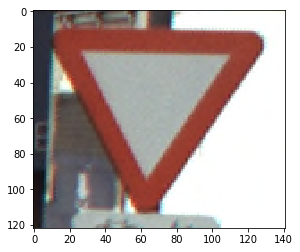

(122, 141, 3)


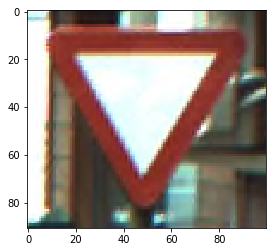

(91, 100, 3)


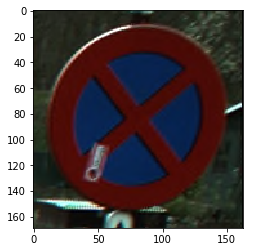

(169, 163, 3)


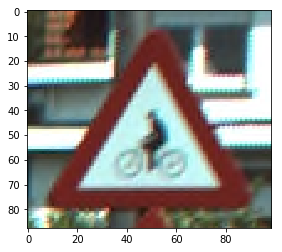

(88, 99, 3)


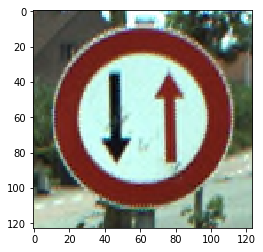

(123, 124, 3)


In [47]:
for inds in [10, 200, 500, 2000, 1200]:
    plt.imshow(images[inds])
    plt.show()
    print(images[inds].shape)

In [48]:
labels[:5]

[19, 19, 19, 19, 19]

In [49]:
len(np.unique(labels))

62

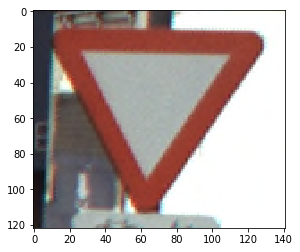

In [50]:
plt.imshow(images[10])

In [51]:
images.size

4575

In [52]:
labels[:5]

[19, 19, 19, 19, 19]

In [53]:
len(np.unique(labels))

62

In [54]:
labels = np.array(labels)

# Rescale

In [65]:
from skimage import transform 

# Rescale the images in the `images` array
imagesRescaled = [transform.resize(image, ( 100, 100)) for image in images]

/home/aananya/Work/GenderBiasAnalysis/.venvLime/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


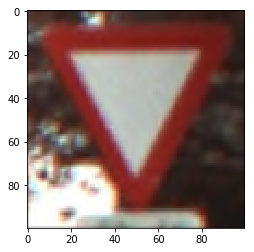

In [66]:
plt.imshow(imagesRescaled[38])

In [67]:
np.array(imagesRescaled).shape

(4575, 100, 100, 3)

# Grayscale

In [68]:
labels[:10]

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19])

In [70]:
from skimage.color import rgb2gray
imagesRescaled = np.array(imagesRescaled)
imagesRescaled = rgb2gray(imagesRescaled)

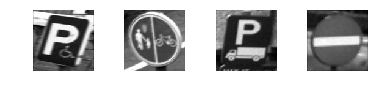

In [72]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(imagesRescaled[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [73]:
imagesRescaled.shape

(4575, 100, 100)

# Tensorflow

<h3> Placeholders </h3>

In [74]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 100, 100])
y = tf.placeholder(dtype = tf.int32, shape = [None])

In [75]:
x

<tf.Tensor 'Placeholder:0' shape=(?, 100, 100) dtype=float32>

Flatten the input data

In [78]:
images_flat = tf.contrib.layers.flatten(x)

In [77]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 10000) dtype=float32>

This will give [None, width*height] images

In [79]:
images_flat.shape

TensorShape([Dimension(None), Dimension(10000)])

<b> Fully-connected layer and relu activation </b>

<i>
tf.contrib.layers.fully_connected(
    inputs,
    num_outputs,
    activation_fn=tf.nn.relu,
    normalizer_fn=None,
    normalizer_params=None,
    weights_initializer=initializers.xavier_initializer(),
    weights_regularizer=None,
    biases_initializer=tf.zeros_initializer(),
    biases_regularizer=None,
    trainable=True
)
</i>

In [80]:
y_probs = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

In [81]:
y_probs

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

<b> Define the loss function </b>

The functionality of numpy.mean and tensorflow.reduce_mean are the same

In [82]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = y_probs))

<b>define a training optimizer </b>

In [83]:
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

<b>initialize the operations to execute before going over to the training </b>

In [85]:
# Convert logits to label indexes
correct_pred = tf.argmax(y_probs, 1)

In [86]:
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


# Train

You also pass a feed_dict argument, with which you feed data to the model

In [88]:
sess = tf.Session()

In [89]:
sess.run(tf.global_variables_initializer())

In [92]:
for i in range(200):
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: imagesRescaled, y: labels})
        if i % 20 == 0:
            print("Loss: ", loss, " at epoch: ", i)

Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  40
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  60
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  80
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  100
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  120
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  140
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  160
Loss:  Tensor("Mean:0", shape=(), dtype=float32)  at epoch:  180


# Evaluation

In [94]:
import random

In [96]:
sample_indexes = random.sample(range(len(imagesRescaled)), 10)
sample_images = [imagesRescaled[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

In [97]:
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]                        

In [98]:
predicted

array([28, 44, 32, 32, 28, 38, 40, 38, 41, 38])

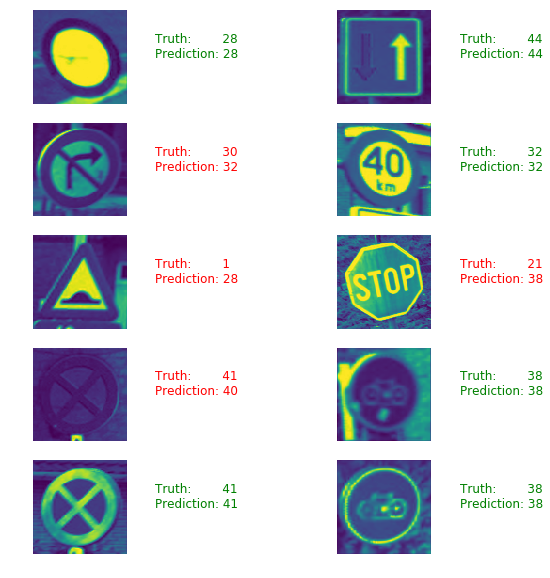

In [103]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(130, 50, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

# Evaluate on test data

Process test data

In [104]:
test_images, test_labels = load_data(test_data_directory)
test_imagesRescaled = [transform.resize(image, (100, 100)) for image in test_images]
test_imagesRescaled = np.array(test_imagesRescaled)
test_imagesRescaled = rgb2gray(test_imagesRescaled)

/home/aananya/Work/GenderBiasAnalysis/.venvLime/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Run predictions against the full test set.

In [106]:
predicted = sess.run([correct_pred], feed_dict={x: test_imagesRescaled})[0]

Calculate correct matches 

In [108]:
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

Calculate the accuracy

In [111]:
accuracy = match_count / len(test_labels)

In [112]:
accuracy

0.4849206349206349

<h3> Remember to close the session </h3>

In [113]:
sess.close()